# Análisis de Tensión Plana con Elementos Triangulares (CST)
Este notebook demuestra cómo analizar un problema de **tensión plana** utilizando el elemento triangular de deformación constante (CST, por sus siglas en inglés). Este es un elemento fundamental en el MEF para modelar cuerpos 2D.

Características clave del elemento CST:
- Es un elemento triangular de 3 nodos.
- Cada nodo tiene **dos grados de libertad**: desplazamiento en 'x' y en 'y'.
- Asume que la **deformación (y por tanto el esfuerzo) es constante** dentro de todo el elemento. Por esta razón, se necesitan mallas finas para obtener resultados precisos en zonas con altos gradientes de esfuerzo.

**Problema:**
 
El siguiente ejemplo, basado en el libro *A First Course in the Finite Element Method* de Daryl L. Logan, analiza la placa delgada mostrada a continuación. La placa está empotrada en el borde izquierdo y sometida a una carga distribuida en el borde derecho, que se discretiza en dos fuerzas nodales. Se busca determinar los desplazamientos, reacciones y el estado de esfuerzos en la placa.

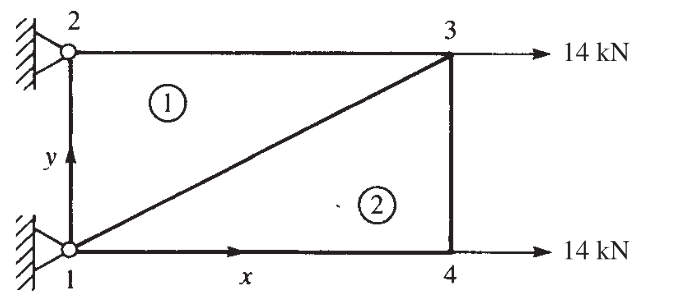

In [1]:
from mnspy import Nodo, TriangularCST, Ensamble

### Paso 1: Definición de los Nodos (Pre-procesamiento)

Se crean los nodos del sistema, especificando sus coordenadas (x, y) y sus condiciones de frontera.
- `{'x': False, 'y': False}`: Apoyo empotrado (restringe ambos desplazamientos).
- `{'x': True, 'y': True}`: Nodo libre.

In [2]:
n_1= Nodo('1', 0, 0, grados_libertad={'x': False, 'y': False})
n_2= Nodo('2', 0, 0.2, grados_libertad={'x': False, 'y': False})
n_3= Nodo('3', 0.4, 0.2, grados_libertad={'x': True, 'y': True})
n_4= Nodo('4', 0.4, 0, grados_libertad={'x': True, 'y': True})

### Paso 2: Definición de los Elementos (Discretización)
 
Se crean los elementos `TriangularCST`. Se debe especificar el espesor de la placa, el Módulo de Young (`E`) y el Coeficiente de Poisson (`coef_poisson`).

In [3]:
e_1 = TriangularCST('1', n_1, n_2, n_3, espesor=0.02, E=210E6, coef_poisson=0.3)
e_2 = TriangularCST('2', n_1, n_3, n_4, espesor=0.02, E=210E6, coef_poisson=0.3)

### Paso 3: Aplicación de Cargas Externas
 
Se aplican las fuerzas nodales equivalentes a la carga distribuida.

In [4]:
n_3.agregar_fuerza_externa(14,'x')
n_4.agregar_fuerza_externa(14,'x')

### Paso 4: Matrices de Rigidez de los Elementos

Cada elemento CST tiene una matriz de rigidez de 6x6 que relaciona las fuerzas y desplazamientos nodales.

In [5]:
e_1

TriangularCST: 1

In [6]:
e_2

TriangularCST: 2

### Paso 5: Ensamble del Sistema

Se crea un objeto `Ensamble` que agrupa los dos elementos y se visualiza el problema.

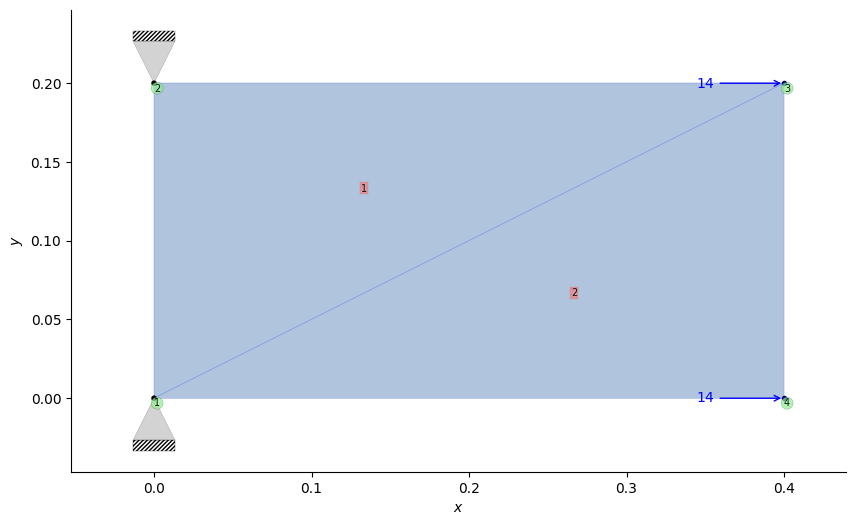

In [7]:
mg = Ensamble([e_1, e_2])
mg.diagrama_cargas()

### Paso 6: Matriz de Rigidez Global y Reducida

El ensamble construye la matriz de rigidez global del sistema completo. Luego, se extrae la matriz reducida que corresponde únicamente a los grados de libertad desconocidos. 

In [8]:
print("--- Matriz de Rigidez Global ---")
mg

--- Matriz de Rigidez Global ---


In [9]:
print("\n--- Matriz de Rigidez Global Reducida ---")
mg.matriz_global_reducida()


--- Matriz de Rigidez Global Reducida ---


<IPython.core.display.Math object>

### Paso 7: Solución del Sistema

Se resuelve el sistema `[K]{u} = {F}` para encontrar los desplazamientos desconocidos y luego se calculan las fuerzas de reacción.

In [10]:
mg.solucionar_por_gauss_y_calcular_reacciones()
# El método `solucion()` muestra los desplazamientos calculados.
mg.solucion()

Desplazamientos,Reacciones
$u_{1}=0$,$\color{blue}F_{1x}=-14$
$v_{1}=0$,$\color{blue}F_{1y}=-8.40672538$
$u_{2}=0$,$\color{blue}F_{2x}=-14$
$v_{2}=0$,$\color{blue}F_{2y}=8.40672538$
$\color{blue}u_{3}=1.219161996 \times 10^{-5}$,$\cancel{F_{3x}}$
$\color{blue}v_{3}=8.326661329 \times 10^{-8}$,$\cancel{F_{3y}}$
$\color{blue}u_{4}=1.327408594 \times 10^{-5}$,$\cancel{F_{4x}}$
$\color{blue}v_{4}=2.081665332 \times 10^{-6}$,$\cancel{F_{4y}}$


In [11]:
# Al mostrar el objeto `Ensamble` de nuevo, se puede ver el estado completo del sistema, incluyendo los resultados.
mg

### Paso 8: Post-procesamiento

Una vez resuelto el sistema, se pueden calcular los esfuerzos en cada elemento y visualizar los resultados globales.
#### 8.1 Análisis de Esfuerzos por Elemento

Para cada elemento, podemos obtener el tensor de esfuerzos, los esfuerzos principales y un esfuerzo equivalente de Von Mises.

In [12]:
print("--- Esfuerzos en Elemento 1 ---")
print("Tensor de esfuerzos [σ_x, σ_y, τ_xy]:")
e_1.esfuerzos()

--- Esfuerzos en Elemento 1 ---
Tensor de esfuerzos [σ_x, σ_y, τ_xy]:


,Esfuerzos
$\sigma_{x}$,7033.63
$\sigma_{y}$,2110.09
$\tau_{xy}$,16.8135


In [13]:
print("Esfuerzos principales [σ_1, σ_2]:")
e_1.esfuerzos_principales()

Esfuerzos principales [σ_1, σ_2]:


,Esfuerzos Principales
$\sigma_{max}$,7033.68
$\sigma_{min}$,2110.03
$\theta_{p}$,0.195657


In [14]:
e_1.esfuerzo_von_mises()

,Esfuerzo de Von Mises
$\sigma_{vm}$,6251.69


In [15]:
print("--- Esfuerzos en Elemento 2 ---")
print("Tensor de esfuerzos [σ_x, σ_y, τ_xy]:")
e_2.esfuerzos()

--- Esfuerzos en Elemento 2 ---
Tensor de esfuerzos [σ_x, σ_y, τ_xy]:


,Esfuerzos
$\sigma_{x}$,6966.37
$\sigma_{y}$,-8.40673
$\tau_{xy}$,-16.8135


In [16]:
print("Esfuerzos principales [σ_1, σ_2]:")
e_2.esfuerzos_principales()

Esfuerzos principales [σ_1, σ_2]:


,Esfuerzos Principales
$\sigma_{max}$,6966.41
$\sigma_{min}$,-8.44726
$\theta_{p}$,-0.138117


In [17]:
e_2.esfuerzo_von_mises()

,Esfuerzo de Von Mises
$\sigma_{vm}$,6970.64


#### 8.2 Visualización de Resultados Globales

Finalmente, se puede graficar la forma deformada de la placa y un mapa de contorno del esfuerzo de Von Mises.

--- Deformada de la Placa ---


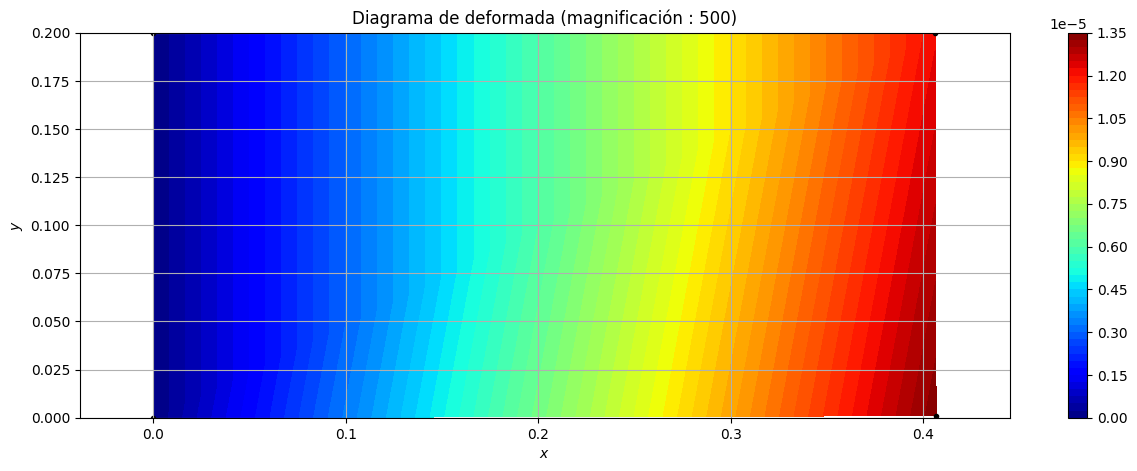

In [18]:
print("--- Deformada de la Placa ---")
# Se usa un factor de magnificación para que la deformación sea visible.
mg.deformada(magnificacion=500)

--- Diagrama de Esfuerzo de Von Mises ---


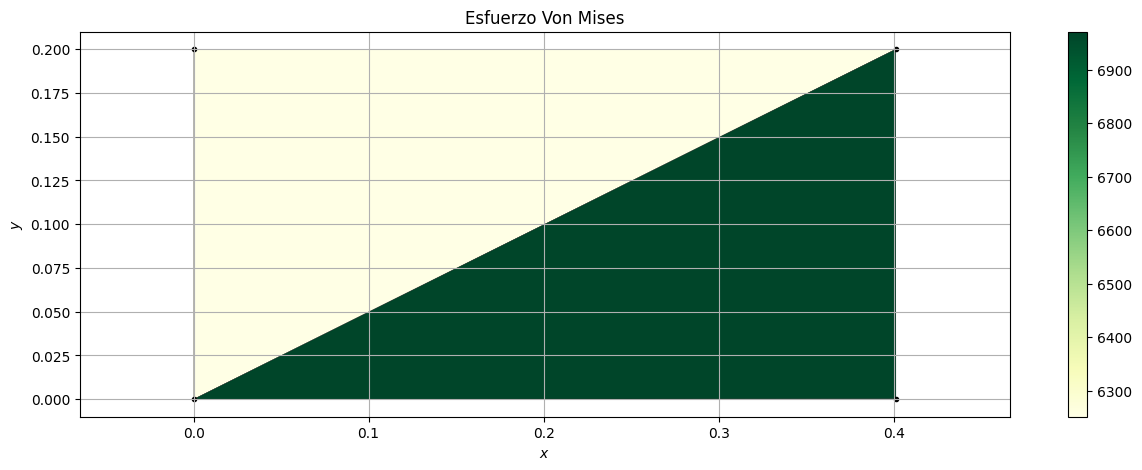

In [19]:
print("--- Diagrama de Esfuerzo de Von Mises ---")
# Muestra la distribución del esfuerzo equivalente en la placa.
mg.diagrama_de_esfuerzo_von_mises(100)